### Loading Kaggle Files

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets  download jmcaro/wheat-seedsuci

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
! unzip wheat-seedsuci.zip

unzip:  cannot find or open wheat-seedsuci.zip, wheat-seedsuci.zip.zip or wheat-seedsuci.zip.ZIP.


## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Input File

In [8]:
df = pd.read_csv("seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
df['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

## Removing the Target Column before preprocessing

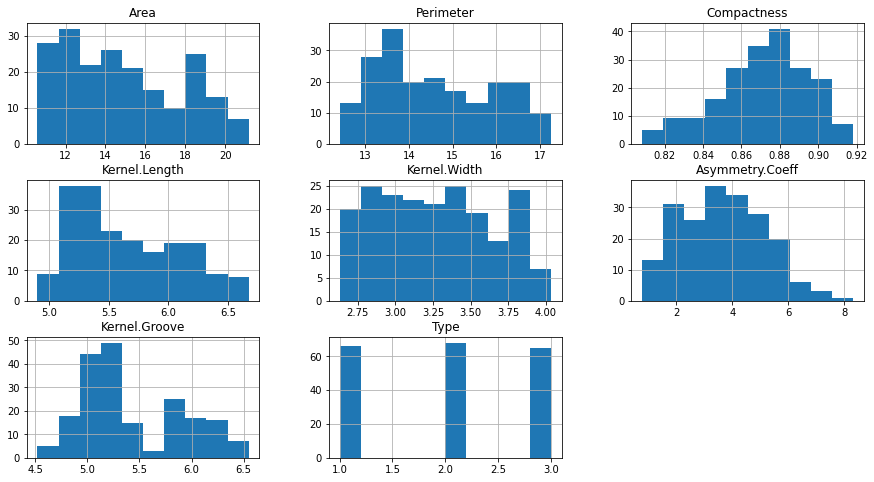

In [10]:
plt.rcParams["figure.figsize"] = (15,8)
df.hist()
plt.show()

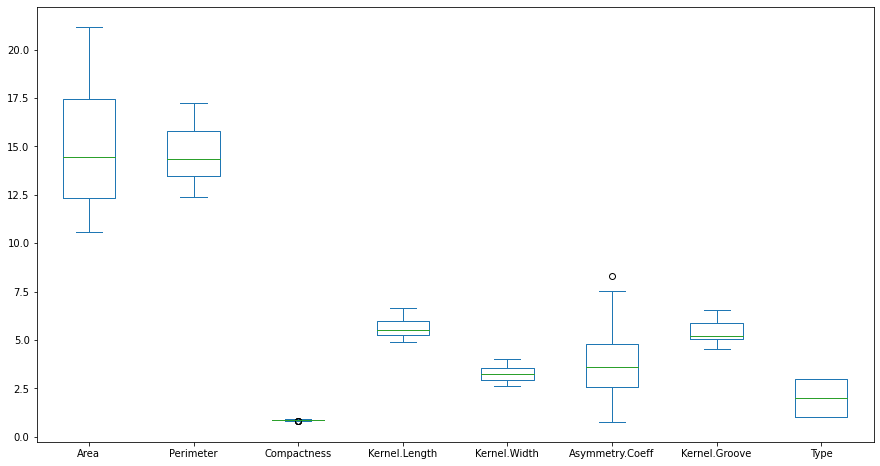

In [11]:
df.plot(kind = 'box')
plt.show()

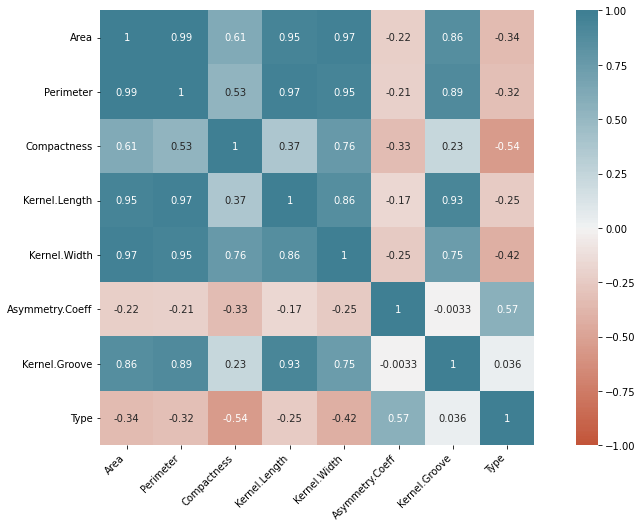

In [12]:
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
# Normalize the data using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## Remove the target columns before normalization

In [14]:
#df.columns
cols = ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove']
df1 = df[cols]
df1.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [15]:
print(scaler.fit(df1))
print(scaler.data_max_)

MinMaxScaler()
[21.18   17.25    0.9183  6.675   4.033   8.315   6.55  ]


In [16]:
norm_df = pd.DataFrame(scaler.transform(df1))
norm_df.columns = df1.columns
norm_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994


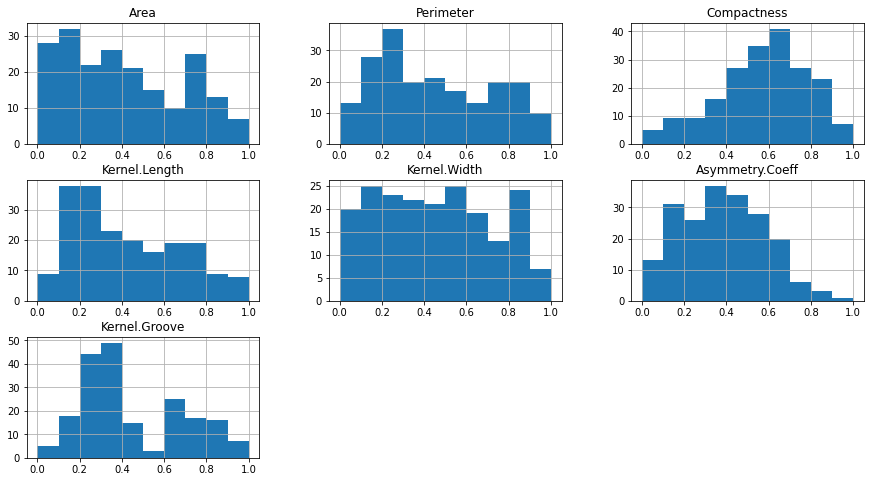

In [17]:
norm_df.hist()
plt.show()

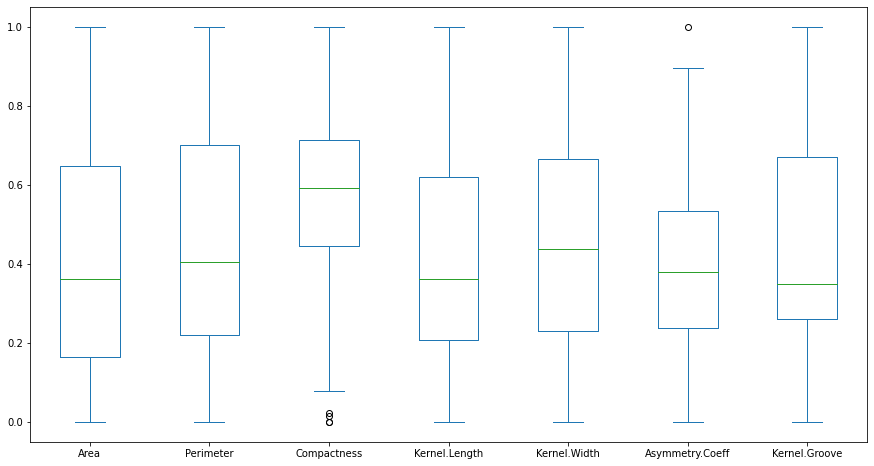

In [18]:
norm_df.plot(kind = 'box')
plt.show()

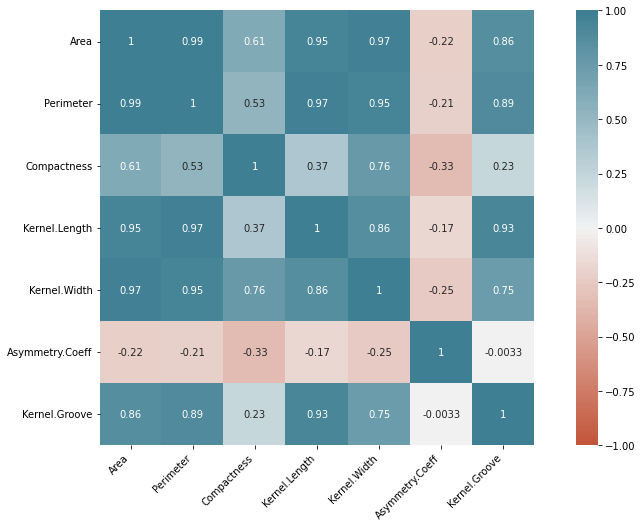

In [19]:

ax = sns.heatmap(
    norm_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
norm_df['Type'] =  df['Type']
norm_df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150,1
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165,1
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665,1
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817,1
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994,1


# Detect and Remove Outliers

In [21]:
from scipy.stats import zscore

In [22]:
z_scores = zscore(norm_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = norm_df[filtered_entries]

print(norm_df.shape)
print(new_df.shape)

(199, 8)
(198, 8)


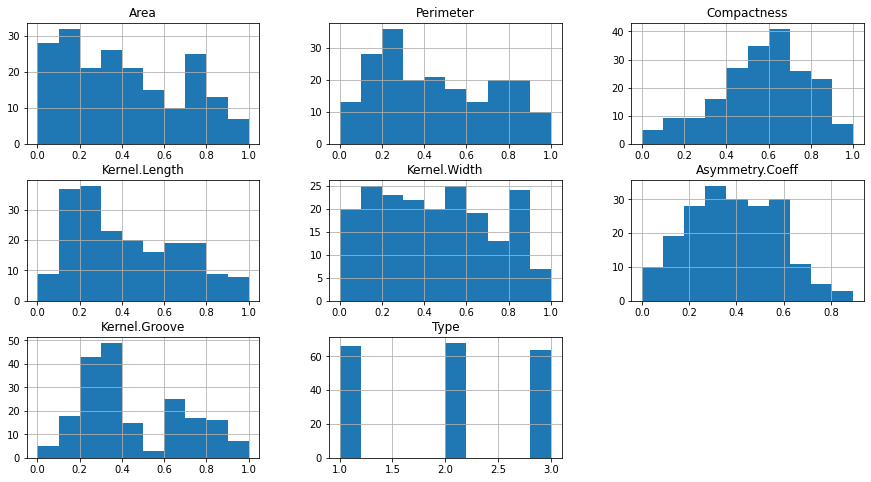

In [23]:
new_df.hist()
plt.show()

## Build the Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
print(cols)

['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']


In [26]:
X = new_df[cols]
y = new_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1, shuffle=True)

## Decision Tree Classifier

Accuracy: 87.5 %
[[14  2  2]
 [ 0  9  0]
 [ 1  0 12]]


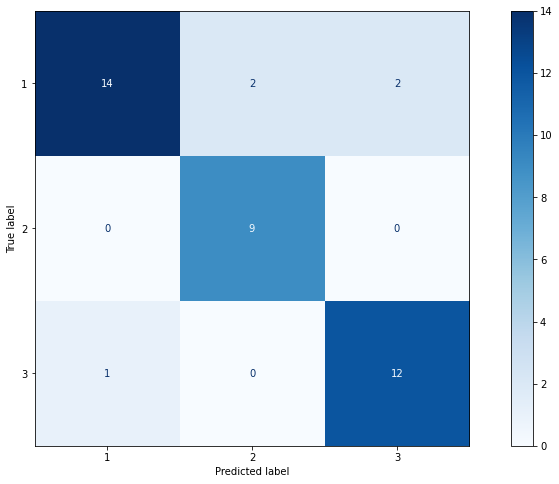

In [27]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
y_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_tree)*100,"%")
cm_tree = confusion_matrix(y_test, y_tree, labels = tree.classes_)
print(cm_tree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_tree, display_labels = tree.classes_)
disp.plot(cmap = 'Blues')

## SVM

Accuracy: 90.0 %
[[14  1  3]
 [ 0  9  0]
 [ 0  0 13]]


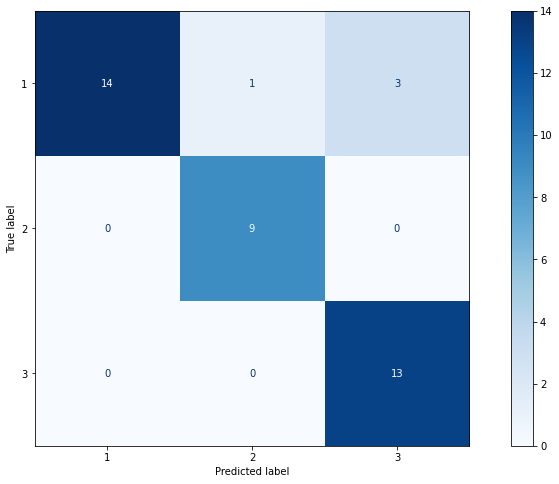

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C= 1).fit(X_train,y_train)
y_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_svm)*100,"%")
cm_svm = confusion_matrix(y_test, y_svm, labels = svm.classes_)
print(cm_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = svm.classes_)
disp_svm.plot(cmap = 'Blues')


## Remove Perimter from input data to avoid multicollinearity

In [29]:
new_df1 = new_df.drop(['Perimeter'],axis = 1)
print(new_df.columns)
print(new_df1.columns)

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')
Index(['Area', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')


In [30]:
X = new_df[cols]
y = new_df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1, shuffle=True)

Accuracy: 90.0 %
[[14  1  3]
 [ 0  9  0]
 [ 0  0 13]]


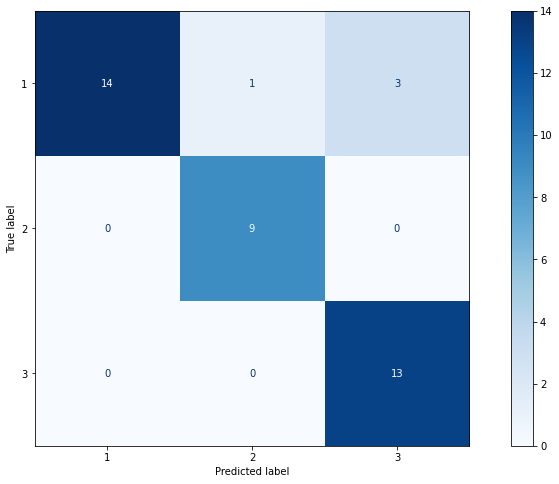

In [31]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'linear', C= 1).fit(X_train,y_train)
y_svm1 = svm1.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_svm1)*100,"%")
cm_svm1 = confusion_matrix(y_test, y_svm1, labels = svm1.classes_)
print(cm_svm1)
disp_svm1 = ConfusionMatrixDisplay(confusion_matrix = cm_svm1, display_labels = svm1.classes_)
disp_svm1.plot(cmap = 'Blues')


In [32]:
#create a pickle file
import pickle
pickle_out=open("svc.pkl","wb")
pickle.dump(svm1,pickle_out)
pickle_out.close()

In [33]:
svm1.predict([[0.405099,0.662432,0.368806,0.501069,0.033497,0.215165]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored